Wrapping R libraries with Rpy
====

In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [19]:
from IPython.core.display import Image
import uuid 

In [30]:
import rpy2.robjects as robjects

In [14]:
from rpy2.robjects.packages import importr

In [15]:
fastclime = importr('fastclime')
grdevices = importr('grDevices')

In [17]:
def fastclime_plot(data):
    fn = '{uuid}.png'.format(uuid = uuid.uuid4())
    grdevices.png(fn, width = 800, height = 600)
    fastclime.fastclime_plot(data)
    grdevices.dev_off()
    return Image(filename=fn)

In [12]:
L = fastclime.fastclime_generator(n = 100, d = 20)

Generating data from the multivariate normal distribution with the random graph structure....done.


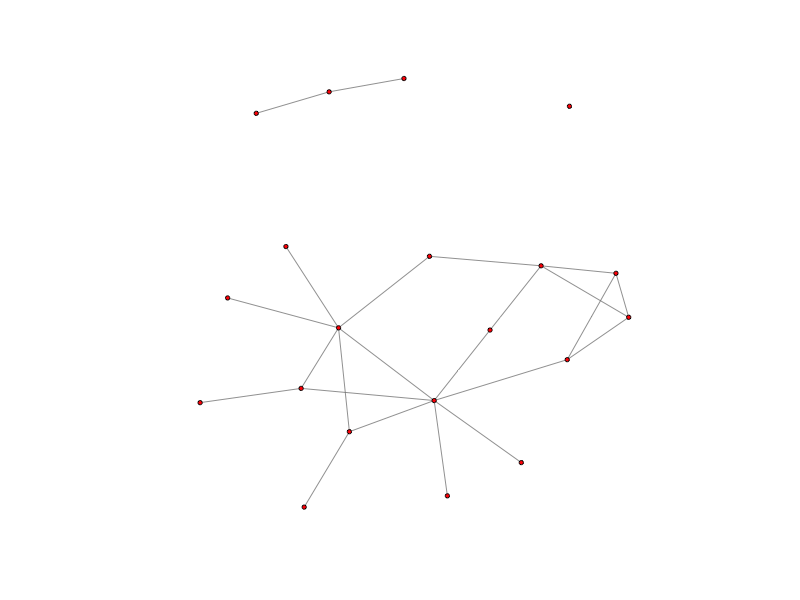

In [20]:
out1 = fastclime.fastclime(L.rx2('data'),0.1)
O = fastclime.fastclime_lambda(out1.rx2('lambdamtx'), out1.rx2('icovlist'),0.2)
fastclime_plot(O.rx2('path'))

Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 


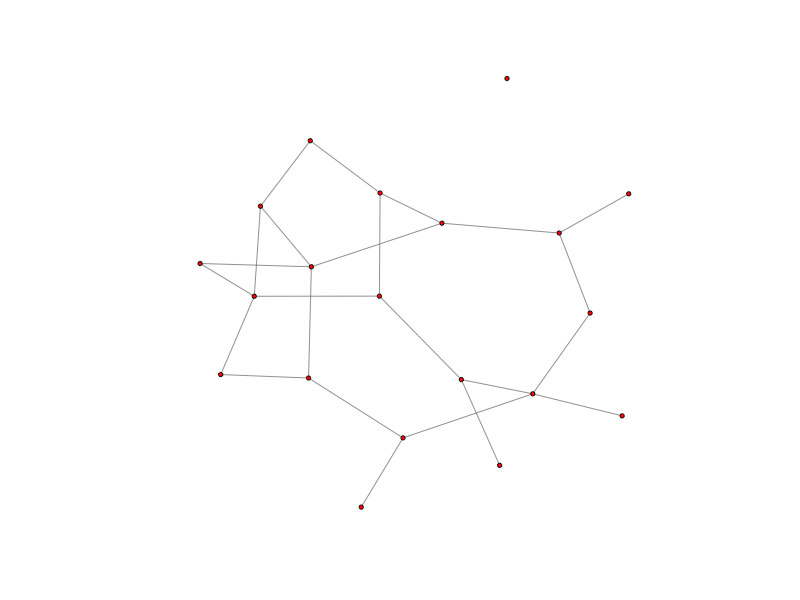

In [35]:
out1 = fastclime.fastclime(cor(L.rx2('data')),0.1)
O = fastclime.fastclime_lambda(out1.rx2('lambdamtx'), out1.rx2('icovlist'),0.2)
fastclime_plot(O.rx2('path'))

In [44]:
#generate an LP problem and solve it
r_matrix = robjects.r['matrix']

A = r_matrix(robjects.FloatVector([-1,-1,0,1,-2,1]), nrow = 3)
b = robjects.FloatVector([-1,-2,1])
c = robjects.FloatVector ([-2,3])
v = fastclime.fastlp(c,A,b)

optimal solution found! 


In [45]:
v

<FloatVector - Python:0x11dec5290 / R:0x1223ecdc8>
[2.000000, 1.000000]

In [46]:
np.array(v)

array([ 2.,  1.])

In [47]:
#generate an LP problem and solve it

b_bar = robjects.FloatVector([1,1,1])
c_bar = robjects.FloatVector([1,1])
fastclime.paralp(c,A,b,c_bar,b_bar)

optimal solution found! 


<FloatVector - Python:0x11df20e60 / R:0x1223ed030>
[1.333333, 0.333333]